# Instalação dos pacotes Python necessários
Primeiramente, é preciso instalar o sklearn e o pandas

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install pandas

# Carregamento dos dados e vetorização
Após isso, carrega-se os dados da base **classic4.csv** e o texto dessa base é vetorizada.


In [4]:
import utils
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import linear_model
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# lendo csv
df = utils.read_csv("classic4.csv")
# divide a base de dados em 80% train e 20% test
x_train, x_test = train_test_split(df, test_size=0.2, stratify=df['class'])

categories_on_df = list(set(df['class']))   # pega todas as categorias da base de dados
dict_cats = {y: x for x, y in enumerate(categories_on_df)}
lista_cats = list(dict_cats.keys())
print(lista_cats)
print(f"Numero de classes: {len(lista_cats)}")

x_train_tf, x_test_tf = utils.occ_vectorizer(x_train['text'], x_test['text'])

['med', 'cran', 'cisi', 'cacm']
Numero de classes: 4


# TFIDF
Após a vetorização, conta-se o número de ocorrências de cada termo em um documento em relação a toda a base de dados. Essa medida estatística é conhecida como **TFIDF** (Term Frequency-Inverse Document Frequency)

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_t = TfidfTransformer()
xtrain_tfidf, xtest_tfidf = utils.tfidif(x_train_tf, x_test_tf)

y_train = utils.get_ytrain(x_train['class'], dict_cats)
y_test = utils.get_ytest(x_test['class'], dict_cats)

# Melhores resultados do Grid Search
Iremos utilizar os melhores hiperparâmetros definidos pelo GridSearch para cada um desses três modelos: Multinomial Naive Bayes, Random Forest e Logistic Regression

In [6]:
csv_file_path = "Grid_Search_Results.csv"

df = pd.read_csv(csv_file_path)

df

,Model,Best Score,Best Parameters,Test Set f1_macro
0,Random Forest,0.930299,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.945736
1,Logistic Regression,0.958253,"{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}",0.965469
2,Naive Bayes,0.961453,"{'alpha': 0.1, 'fit_prior': True, 'force_alpha...",0.967583


# Multinomial Naive Bayes
* **alpha**: parâmetro de suavização (smoothing) aditiva (Laplace/Lidstone)
* **fit_prior**: se for True, o modelo aprende a priorizar classes. False significa que o modelo usa uma distribuição uniforme e não prioriza as classes
* **force_alpha**: se for False e alpha for menor que 1e-10, alpha é fixado em 1e-10. Caso True, o alpha permanece inalterado em todos os casos.

Accuracy: 0.9548978153629316
[[198   1   7   0]
 [  0 277   0   3]
 [  0   0 277  15]
 [  0   7  31 603]]
F1 Score Macro: 0.9572600803677788
F1 Score Micro: 0.9548978153629316


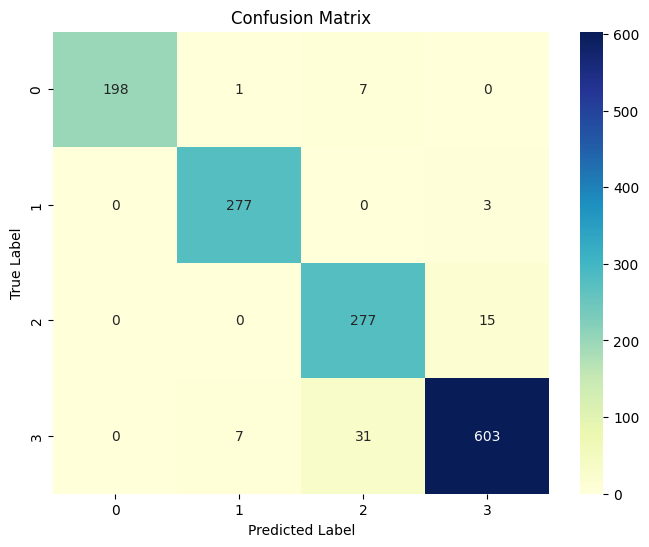

In [7]:
mnb = MultinomialNB(alpha =  0.1, fit_prior = True, force_alpha = True).fit(xtrain_tfidf, y_train)
predicted = mnb.predict(xtest_tfidf)

print(f"Accuracy: {metrics.accuracy_score(y_test, predicted)}")
print(f"F1 Score Macro: {f1_score(y_test, predicted, average='macro')}")
print(f"F1 Score Micro: {f1_score(y_test, predicted, average='micro')}")

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Logistic Regression
* **C**: parâmetro responsável pelo inverso da força da regulatização. Quanto mais próximo de 0, mais forte é a regularização.
* **solver**: algoritmo de escolha que será utilizado para a otimização. Foram escolhidos apenas 2 porque são os únicos que aceitam ambas regularizações l1 e l2.
* **penalty**: especifica a norma da penalidade. l1, l2 ou ambas (elasticnet)

Accuracy: 0.9534883720930233
F1 Score Macro: 0.9540908051246658
F1 Score Micro: 0.9534883720930233


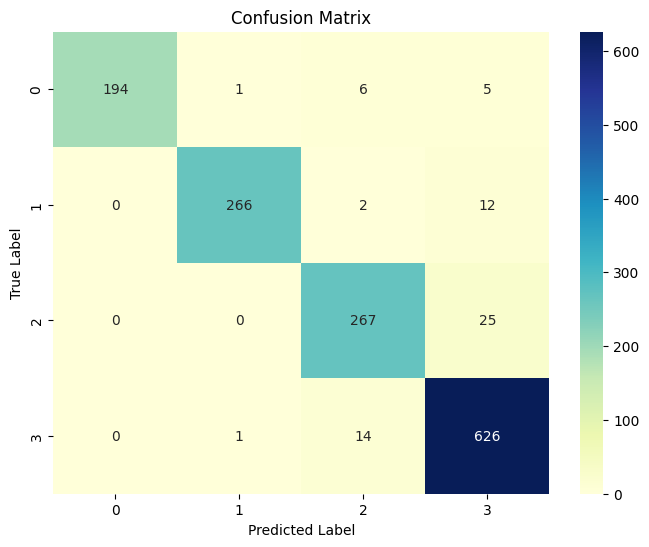

In [8]:
lreg = linear_model.LogisticRegression(C=1.0, penalty = 'l2', solver = 'saga')
lreg.fit(xtrain_tfidf, y_train)
predicted = lreg.predict(xtest_tfidf)

print(f"Accuracy: {metrics.accuracy_score(y_test, predicted)}")
print(f"F1 Score Macro: {f1_score(y_test, predicted, average='macro')}")
print(f"F1 Score Micro: {f1_score(y_test, predicted, average='micro')}")

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Random Forest
* **n_estimators**: número de árvores na forest
* **max_depth**: A profundidade máxima da árvore
* **min_samples_split**: o número mínimo de amostras necessárias para dividir um nó interno da árvore
* **min_samples_leaf**: o número mínimo de amostras que pode estar em um nó folha

Accuracy: 0.9189570119802678
F1 Score Macro: 0.9161694182436114
F1 Score Micro: 0.9189570119802678


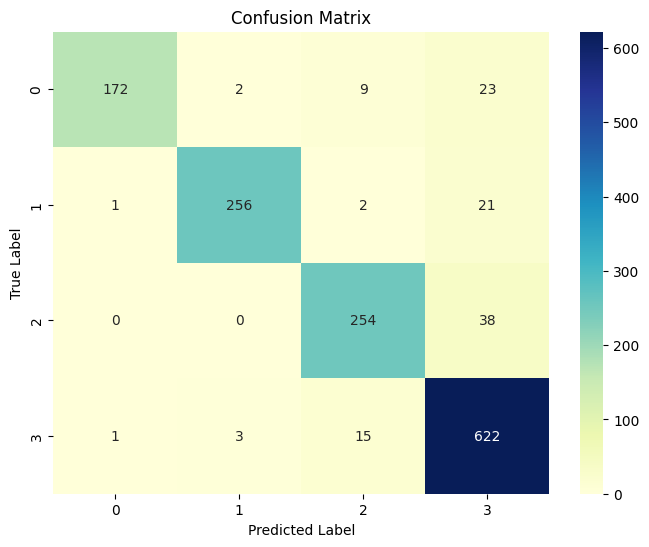

In [9]:
random_f = RandomForestClassifier(n_estimators=200, max_depth = None, min_samples_leaf = 1, min_samples_split = 10).fit(xtrain_tfidf, y_train)
predicted = random_f.predict(xtest_tfidf)

print(f"Accuracy: {metrics.accuracy_score(y_test, predicted)}")
print(f"F1 Score Macro: {f1_score(y_test, predicted, average='macro')}")
print(f"F1 Score Micro: {f1_score(y_test, predicted, average='micro')}")

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()